# Some Protocols for Fair Division

In [1]:
from problem import Problem
import fairness_measures
#import simulations

Several protocols have been implemented. They can be accessed by importing the module protocols. 

In [2]:
import protocols

In [3]:
p0 = Problem(3,6,'empty', centralized=True)
p0.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':8,'r5':1},\
{'r0':2,'r1':3,'r2':9,'r3':1,'r4':2,'r5':3}])
print (p0)
print (p0.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 8, 'r5': 1}
agent 2{'r0': 2, 'r1': 3, 'r2': 9, 'r3': 1, 'r4': 2, 'r5': 3}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0



## 4.1 Adjusted Winner

In [4]:
p1 = Problem(3,4,'normalized',centralized=True)
print(p1)

agent 1{'r0': 0.343, 'r1': 0.245, 'r2': 0.23, 'r3': 0.181}
agent 2{'r0': 0.03, 'r1': 0.271, 'r2': 0.677, 'r3': 0.023}



In [5]:
protocols.adjustedWinner(p0,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                       ['r3', 'r4']	11
agent  2           ['r0', 'r1', 'r2', 'r5']	17

[(1.5, 'r1'), (2.0, 'r0'), (1.8, 'r2'), (3.0, 'r5')]
Resource  r1  moves from  2  to  1
Resource  r2  will be splitted!
Agent  1  gets  0.071  of resource  r2
Both agents get utility: 13.355


(13.355, 'r2', 1, 0.07142857142857142)

Make sure that you understand exactly why items are allocated this way. 

### Question: Manipulating Adjusted Winner

In [6]:
p2 = Problem(3,2,'uniform',centralized=True)
p2.setUtilities(
[{'r0':0,'r1':0},\
{'r0':75,'r1':25},\
{'r0':25,'r1':75}]
)
print (p2)

agent 1{'r0': 75, 'r1': 25}
agent 2{'r0': 25, 'r1': 75}



In that case, the output of the adjusted winner protocol is rather obvious. Each agent gets its preferred item and everyone enjoys 75 of utility. 

In [7]:
protocols.adjustedWinner(p2,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	75
agent  2                             ['r1']	75

[(3.0, 'r1')]


(75, 'r1', 1, 0)

But can you find a **manipulation** for agent 1, that is, a way to misrepresent the preferences of the agent (in other words, announce a valuation for an item which differs from the real one) such that the utility is in reality higher? 
Note that you will need to compute the allocation with the **declared** preferences, but that the actual utility enjoyed by agents must be computed with their **true** preferences. 

In [8]:
p2 = Problem(3,2,'uniform',centralized=True)
p2.setUtilities(
[{'r0':0,'r1':0},\
{'r0':26,'r1':74},\
{'r0':25,'r1':75}]
)
protocols.adjustedWinner(p2,verbose=True)

Output allocation phase:
auctioneer                                  []	
agent  1                             ['r0']	26
agent  2                             ['r1']	75

[(1.014, 'r1')]
Resource  r1  will be splitted!
Agent  1  gets  0.329  of resource  r1
Both agents get utility: 50.346000000000004


(50.346000000000004, 'r1', 1, 0.3288590604026846)

What is the "best" manipulation that agent 1 can do? 
To evaluate this, it will be useful to run a script trying all the different values possibly announced by agent 1, and to plot the utility obtained with each of these. 

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Vérification avec un script qui essaye toutes les valeurs possibles annoncées par l'agent 1
# prend en paramètre les vraies utilités de r0 et r1 pour l'agent 1
# (les utilités pour l'agent 2 sont considérées comme fixes)

def manipulation_a1(vraie_utilite_r0, vraie_utilite_r1):

    y = []
    
    for i in range(100):
        
        pb = Problem(3, 2, 'uniform', centralized = True)
        
        utilites = [{'r0':0,'r1':0},\
                {'r0':i+1,'r1':(100-i-1)},\
                {'r0':25,'r1':75}]
        
        pb.setUtilities(utilites)
        
        u, r, low, part_of_low = protocols.adjustedWinner(pb,verbose=False)

        # l'agent 2 a moins d'utilité que l'agent 1
        if low == 2: 
            # r = ressource à partager
            if r=='r0':
                y.append(vraie_utilite_r1 * (1-part_of_low))

            else:
                y.append(vraie_utilite_r0 * (1-part_of_low))
        else:
            y.append(vraie_utilite_r1 + part_of_low * vraie_utilite_r0) 

    x = np.arange(100)
    y = np.array(y)
    
    return x, y

# Affichage de l'utilité obtenue par l'agent 1 pour toutes les valeurs possibles annoncées par l'agent 1

x, y = manipulation_a1(25, 75)
xmax = x[np.argmax(y)]
ymax = y[np.argmax(y)]


[(1.32, 'r1')]
[(1.307, 'r1')]
[(1.293, 'r1')]
[(1.28, 'r1')]
[(1.267, 'r1')]
[(1.253, 'r1')]
[(1.24, 'r1')]
[(1.227, 'r1')]
[(1.213, 'r1')]
[(1.2, 'r1')]
[(1.187, 'r1')]
[(1.173, 'r1')]
[(1.16, 'r1')]
[(1.147, 'r1')]
[(1.133, 'r1')]
[(1.12, 'r1')]
[(1.107, 'r1')]
[(1.093, 'r1')]
[(1.08, 'r1')]
[(1.067, 'r1')]
[(1.053, 'r1')]
[(1.04, 'r1')]
[(1.027, 'r1')]
[(1.013, 'r1')]
[(1.0, 'r0'), (1.0, 'r1')]
[(1.014, 'r1')]
[(1.027, 'r1')]
[(1.042, 'r1')]
[(1.056, 'r1')]
[(1.071, 'r1')]
[(1.087, 'r1')]
[(1.103, 'r1')]
[(1.119, 'r1')]
[(1.136, 'r1')]
[(1.154, 'r1')]
[(1.172, 'r1')]
[(1.19, 'r1')]
[(1.21, 'r1')]
[(1.23, 'r1')]
[(1.25, 'r1')]
[(1.271, 'r1')]
[(1.293, 'r1')]
[(1.316, 'r1')]
[(1.339, 'r1')]
[(1.364, 'r1')]
[(1.389, 'r1')]
[(1.415, 'r1')]
[(1.442, 'r1')]
[(1.471, 'r1')]
[(1.5, 'r1')]
[(1.531, 'r1')]
[(1.562, 'r1')]
[(1.596, 'r1')]
[(1.63, 'r1')]
[(1.667, 'r1')]
[(1.705, 'r1')]
[(1.744, 'r1')]
[(1.786, 'r1')]
[(1.829, 'r1')]
[(1.875, 'r1')]
[(1.923, 'r1')]
[(1.974, 'r1')]
[(2.027, 'r1'

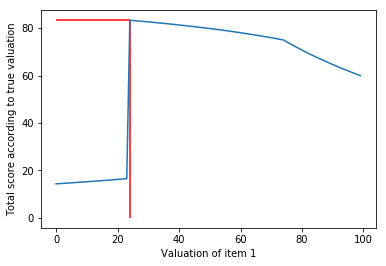

In [32]:
fig, ax = plt.subplots()
ax.set_xlabel('Valuation of item 1')
ax.set_ylabel('Total score according to true valuation')

plt.vlines(x=xmax, ymin=0, ymax=ymax, color='red')
plt.hlines(xmin=0, xmax=xmax, y=ymax, color='red')
plt.plot(x,y)

## 4. 2 Picking Sequences

In [10]:
p3 = Problem(4,6,'empty', centralized=True)
p3.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print (p3)
print (p3.printAllocation())

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0



Let us apply a picking sequence on our problem p3.

In [11]:
s0 = [1,2,3,2,3,1]
protocols.pickingSequence(p3,s0,verbose=True)

agent  1  picks  r4
agent  2  picks  r2
agent  3  picks  r0
agent  2  picks  r1
agent  3  picks  r3
agent  1  picks  r5


In [12]:
print(p3.printAllocation())

auctioneer                                  []	
agent  1                       ['r4', 'r5']	 9
agent  2                       ['r2', 'r1']	14
agent  3                       ['r0', 'r3']	 8



In [13]:
print(fairness_measures.envyMatrix(p3))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


It is also possible to generate standard sequences, like balanced or alternate ones. 

In [14]:
s= protocols.generateSequence(3,6,'balanced')
print(s)

[1, 2, 3, 3, 2, 1]


### Question: What is the fairest picking sequence?

In [15]:
import simulations

Let us consider 3 agents and 5 items. Can you propose some sequence which would do well in terms of egalitarian social welfare? You can simulate a number of picking sequences by specifying: the number of experiments, the number of agents (remember to count agent 0 here-to be fixed sorry), the number of objects, the sequence, and the ways utilities are generated.
    

In [16]:
simulations.simulationPickingSequences(1000,4,5,[1,2,2,1,3],'borda',verbose=False) # mauvaise séquence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 2.964
= Ratio of proportional:                0.201
= Ratio of envy free:                     0.07
= Average number of envious:              0.93
= Average max envy:                      4.293
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [17]:
simulations.simulationPickingSequences(1000,4,5,[1,3,2,2,3],'borda',verbose=False) # meilleur ESW

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                   5.0
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.274
= Average number of envious:             0.826
= Average max envy:                      1.056
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



### And to conclude: 
For 3 agents, and 6 and 8 objects, could you find the fairest picking sequences in terms of: 
* egalitarian social welfare
* average max envy

In [18]:
simulations.simulationPickingSequences(1000,4,8,[1,2,3,1,2,3,1,2],'borda',verbose=False) # to start with a bad sequence

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                13.493
= Ratio of proportional:                0.901
= Ratio of envy free:                    0.587
= Average number of envious:             0.448
= Average max envy:                      1.048
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [19]:
# séquence la plus juste pour 3 agents et 6 objets : [1, 2, 3, 3, 2, 1]
# c'est une séquence symétrique où les agents ne choisissent pas deux fois de suite donc on a une séquence équilibrée
# et juste pour tous les agents
s = protocols.generateSequence(3,6,'balanced')
print(s)
simulations.simulationPickingSequences(1000,4,6,s,'borda',verbose=False)

[1, 2, 3, 3, 2, 1]
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 8.353
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.738
= Average number of envious:             0.266
= Average max envy:                      0.336
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



In [20]:
# séquence la plus juste pour 3 agents et 8 objets : il y en a plusieurs
# c'est le même principe ; les agents ne choisissent pas deux fois de suite et choisissent à nouveau une fois que tout
# le monde a choisi un même nombre d'objets (dans la limite du nombre d'objets donc ici il y a un agent qui a 1 objet 
# de moins)
simulations.simulationPickingSequences(1000,4,8,[1,2,3,3,2,1,2,3],'borda',verbose=False)
simulations.simulationPickingSequences(1000,4,8,[1,2,3,3,2,1,3,2],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                13.896
= Ratio of proportional:                0.968
= Ratio of envy free:                    0.727
= Average number of envious:             0.282
= Average max envy:                      0.571
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                13.899
= Ratio of proportional:                0.972
= Ratio of envy free:                    0.747
= Average number of envious:             0.264
= Average max envy:                      0.554
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



## 4.3 Lipton et al. protocol

Let us now test the protocol of Lipton, which allocates items one by one and solves envy cycles when they occur. 

In [21]:
p4 = Problem(4,6,'empty','centralized')
print(p4)
print(p4.printAllocation())
p4.setUtilities(
[{'r0':0,'r1':0,'r2':0,'r3':0,'r4':0,'r5':0},\
{'r0':1,'r1':2,'r2':5,'r3':3,'r4':7,'r5':2},\
{'r0':2,'r1':6,'r2':8,'r3':1,'r4':1,'r5':2},\
{'r0':5,'r1':4,'r2':4,'r3':3,'r4':2,'r5':2}]
)
print(p4)

protocols.lipton(p4)

agent 1{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 2{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}
agent 3{'r0': 0, 'r1': 0, 'r2': 0, 'r3': 0, 'r4': 0, 'r5': 0}

auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

agent 1{'r0': 1, 'r1': 2, 'r2': 5, 'r3': 3, 'r4': 7, 'r5': 2}
agent 2{'r0': 2, 'r1': 6, 'r2': 8, 'r3': 1, 'r4': 1, 'r5': 2}
agent 3{'r0': 5, 'r1': 4, 'r2': 4, 'r3': 3, 'r4': 2, 'r5': 2}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
Running the Lipton et al. protocol
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
auctioneer ['r0', 'r1', 'r2', 'r3', 'r4', 'r5']	
agent  1                                 []	 0
agent  2                                 []	 0
agent  3                                 []	 0

envy graph: {0: [], 1: [], 2: [], 3: []}
allocating resource  r0
auctioneer      ['r1', 'r2', 'r3', 'r4',

## 4.4 Local deals

Finally, let us play a bit with local exchanges. For this, we will need to create a decentralized MARA problem. Items are intially allocated at random among agents. Here, utilities are Borda. 

In [111]:
import copy

p5 = Problem(4,6,'borda',centralized=False)
print(p5)
print(p5.printAllocation())

p6 = copy.deepcopy(p5)

agent 0{'r0': 3, 'r1': 5, 'r2': 6, 'r3': 4, 'r4': 1, 'r5': 2}
agent 1{'r0': 6, 'r1': 3, 'r2': 5, 'r3': 2, 'r4': 4, 'r5': 1}
agent 2{'r0': 1, 'r1': 3, 'r2': 2, 'r3': 5, 'r4': 6, 'r5': 4}
agent 3{'r0': 2, 'r1': 1, 'r2': 6, 'r3': 5, 'r4': 3, 'r5': 4}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                                 []	 0
agent  1                             ['r0']	 6
agent  2                       ['r2', 'r4']	 8
agent  3                 ['r1', 'r3', 'r5']	10



Can you spot which agents could perform mutually beneficial deals? 

In [112]:
protocols.randomDynamics(p5,True)

agent  1  meets agent  2
agent  2  meets agent  3
deal between  2  and  3 for  r2  and  r1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                                 []	 0
agent  1                             ['r0']	 6
agent  2                       ['r4', 'r1']	 9
agent  3                 ['r3', 'r5', 'r2']	15

agent  2  meets agent  3
agent  1  meets agent  2
agent  0  meets agent  1
agent  0  meets agent  2
agent  1  meets agent  3
agent  0  meets agent  3
End of dynamics. No more deal possible.


Let us check the envy of the final allocation. 

In [113]:
m = fairness_measures.envyMatrix(p5)
g = fairness_measures.buildEnvyGraph(m)
print (g)

{0: [1, 2, 3], 1: [2, 3], 2: [3], 3: []}


### Question: Could you find fairer dynamics?

As it stands, agents just meet randomly (a given pair is picked uniformly among the possible ones). 
Could you conceive a fairer dynamics and test it? 

In [114]:
from operator import itemgetter
import protocols

def fairerDynamics(p,verbose=False):
    testedPairs = []
    allPairs = [(x,y) for x in range(p.n) for y in range(x,p.n) if x!=y]
    #print(allPairs)
    allPairsWithU = []
    u = 0
    for pair in allPairs:
        x = pair[0]
        y = pair[1]
        u = p.agent[x].current_u + p.agent[y].current_u
        allPairsWithU.append((x,y,u))
        
    allPairsWithU = sorted(allPairsWithU, key=itemgetter(2))
    
    for pair in allPairsWithU:
        print(pair[2])
    #random.shuffle(allPairs)

    while len(testedPairs) != len(allPairs):
        candidatePairs = [(x,y,u) for (x,y,u) in allPairsWithU if (x,y,u) not in testedPairs]
        #print (testedPairs)
        # choice in all pairs - tested
        (x,y,u) = candidatePairs[0]
        if verbose:
            print("agent ", x, " meets agent ",y)

        if not(protocols.rationalSwapDeal(p,x,y,verbose)):
            testedPairs.append((x,y,u))
        else:
            testedPairs = []
            if verbose:
                print (p.printAllocation())
    print ("End of dynamics. No more deal possible.")


fairerDynamics(p6,True)

6
8
10
14
16
18
agent  0  meets agent  1
agent  0  meets agent  2
agent  0  meets agent  3
agent  1  meets agent  2
agent  1  meets agent  3
agent  2  meets agent  3
deal between  2  and  3 for  r2  and  r1
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                                 []	 0
agent  1                             ['r0']	 6
agent  2                       ['r4', 'r1']	 9
agent  3                 ['r3', 'r5', 'r2']	15

agent  0  meets agent  1
agent  0  meets agent  2
agent  0  meets agent  3
agent  1  meets agent  2
agent  1  meets agent  3
agent  2  meets agent  3
End of dynamics. No more deal possible.


In [115]:
m = fairness_measures.envyMatrix(p6)
g = fairness_measures.buildEnvyGraph(m)
print (g)

{0: [1, 2, 3], 1: [2, 3], 2: [3], 3: []}


### Question: BT protocol with contested pile

Code the BT protocol, and return the size of the contested pile, the Borda score of agents as well as whether the allocation is EF under the definition seen during the course. When increasing the number of objects, plot the likelihood of the protocol returning an EF allocation. 

In [117]:
# Récupération des ressources triées selon l'utilité de l'agent
def BT_name_prefered_items(p):
    preferences_A = p.agent[0].u.copy()
    preferences_B = p.agent[1].u.copy()
    preferences_A = list(dict(sorted(preferences_A.items(), key=lambda item: item[1], reverse=True)).keys())
    preferences_B = list(dict(sorted(preferences_B.items(), key=lambda item: item[1], reverse=True)).keys())
    return preferences_A,preferences_B

In [118]:
# Allocation des ressources à partir des préférences des agents
def BT_allocation(preferences_A, preferences_B):
    contested_pile = []
    A = []
    B = []
    while not(len(preferences_A) == 0 and len(preferences_B) == 0):
        
        if preferences_A[0] != preferences_B[0]:
            A.append(preferences_A[0])
            B.append(preferences_B[0])
            if preferences_B[0] in preferences_A:
                preferences_A.remove(preferences_B[0])
            if preferences_A[0] in preferences_B:
                preferences_B.remove(preferences_A[0])
        else:
            contested_pile.append(preferences_A[0])
            
        preferences_A.remove(preferences_A[0])
        preferences_B.remove(preferences_B[0])

    return A, B, contested_pile

In [119]:
# Application du protocle BT avec le score de Borda et vérification Envy Free
def BT_protocol(p):
    
    preferences_A, preferences_B = BT_name_prefered_items(p)
#     print("Preferences A :", preferences_A)
#     print("Preferences B :", preferences_B)
    
    bundle_A, bundle_B, contested_pile = BT_allocation(preferences_A.copy(), preferences_B.copy())
#     print("Bundle A :", bundle_A)
#     print("Bundle B :", bundle_B)
#     print("Contested pile :", contested_pile)
    
    # convert bundles to allocations
    bundles = [bundle_A, bundle_B]
    allocation = []
    
    for i in range(len(p.agent)):
        allocation.append([0]*p.m)
        for j in range(len(bundles[i])):
            #print(int(bundles[i][j].split("r")[1]))
            allocation[i][int(bundles[i][j].split("r")[1])] = 1
    
    #print(allocation)
    p.setAllocation(allocation)
    #print(p.printAllocation())
    
    size_contested_pile = len(contested_pile)

    # score de Borda
    borda_score = []
    preferences = [preferences_A, preferences_B]
    for i in range(len(p.agent)):
        borda_score.append(0)
        for j in range(len(bundles[i])):
            borda_score[-1] += len(preferences[i]) - preferences[i].index(bundles[i][j]) - 1
    
    em = fairness_measures.envyMatrix(p)
    #print(em)
    #print("There are ", fairness_measures.nbEnviousAgents(em), " envious agents")
    #print("The maximum envy among two agents is ", fairness_measures.maxEnvy(em))
    is_EF = fairness_measures.isEnvyFree(em)
    
    return size_contested_pile, borda_score[0], borda_score[1], is_EF

In [120]:
# Retourne les axes pour plot l'évolution du ratio EF en fonction du nb d'objets
def plot_likelihood(nb_objects, nb_iterations):
    x = []
    y = []
    for i in range(1,nb_objects):
        cpt = 0
        for j in range(nb_iterations):
            p = Problem(2,i,'borda',centralized=False)
            size_contested_pile, borda_score_a, borda_score_b, is_EF = BT_protocol(p)
            if is_EF:
                cpt += 1
        x.append(i)
        y.append(cpt/nb_iterations)
    return x,y

In [106]:
p_bt = Problem(2,5,'borda',centralized=False)
print(p_bt)
print(p_bt.printAllocation())

temp = BT_protocol(p_bt)
print("taille de contested pile = ", temp[0])
print("utilité agent A = ", temp[1])
print("utilité agent B = ", temp[2])
print("EF = ", temp[3])

agent 0{'r0': 5, 'r1': 2, 'r2': 3, 'r3': 4, 'r4': 1}
agent 1{'r0': 5, 'r1': 2, 'r2': 3, 'r3': 1, 'r4': 4}

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
agent  0                       ['r1', 'r2']	 5
agent  1                 ['r0', 'r3', 'r4']	10

Preferences A : ['r0', 'r3', 'r2', 'r1', 'r4']
Preferences B : ['r0', 'r4', 'r2', 'r1', 'r3']
Bundle A : ['r3']
Bundle B : ['r4']
Contested pile : ['r0', 'r2', 'r1']
taille de contested pile =  3
utilité agent A =  3
utilité agent B =  3
EF =  True


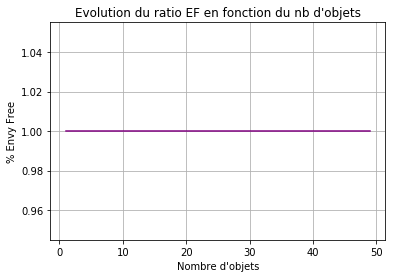

In [122]:
import matplotlib.pyplot as plt

nb_objects = 50
nb_iterations = 100
x,y = plot_likelihood(nb_objects,nb_iterations)

plt.title("Evolution du ratio EF en fonction du nb d'objets")
plt.xlabel("Nombre d'objets")
plt.ylabel("% Envy Free")
plt.plot(x, y, c="purple")
plt.grid()

### References

* The discussion and example about Adjusted Winner Manipulation is taken from a video by Eric Pacuit: 
https://www.youtube.com/watch?v=RtcnSXL69NQ

* See (Bouveret and Lang, IJCAI-11) for more details about picking sequences. 

* See https://www.ams.org/notices/201402/rnoti-p130.pdf for the description of the BT protocol. 

Notebook last updated 2022-01-17

### Questions du cours

* 2 agents: which sequence gives the better ESW on average ? A: [122121] B: [121221]

In [27]:
# En relançant à plusieurs reprises les simulations avec 2 agents et les séquences A et B, on observe un ESW moyen
# équivalent pour les deux séquences.

print("A :")
simulations.simulationPickingSequences(1000,3,6,[1,2,2,1,2,1],'borda',verbose=False) # séquence A

print("B :")
simulations.simulationPickingSequences(1000,3,6,[1,2,1,2,2,1],'borda',verbose=False) # séquence B

A :
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                 12.36
= Ratio of proportional:                0.956
= Ratio of envy free:                    0.956
= Average number of envious:             0.044
= Average max envy:                      0.044
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

B :
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                12.376
= Ratio of proportional:                0.955
= Ratio of envy free:                    0.955
= Average number of envious:             0.045
= Average max envy:                      0.045
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



* 3 agents and 5 goods: which sequence has highest ratio of PROP?

In [85]:
# La séquence suivante a le meilleur ratio PROP. En effet, avec une séquence symétrique, on a ici par exemple l'agent 3 qui
# a choisi en dernier "au premier tour" puis il peut choisir en premier "au second tour" ce qui permet de ne pas favoriser
# en particulier un des agents.

simulations.simulationPickingSequences(1000,4,5,[1,2,3,3,2],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                   5.0
= Ratio of proportional:                  1.0
= Ratio of envy free:                    0.302
= Average number of envious:             0.777
= Average max envy:                      1.028
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=



* 3 agents and 8 goods: which sequence has highest ratio of EF?

In [110]:
# meilleur ratio EF trouvé :

simulations.simulationPickingSequences(1000,4,8,[1,2,3,3,2,1,1,2],'borda',verbose=False)
simulations.simulationPickingSequences(1000,4,8,[1,2,3,3,2,1,2,1],'borda',verbose=False)

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                14.011
= Ratio of proportional:                0.964
= Ratio of envy free:                    0.758
= Average number of envious:             0.251
= Average max envy:                      0.478
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=
= Number of experiments:                 1000
= Average egalitarian sw:                14.078
= Ratio of proportional:                0.976
= Ratio of envy free:                    0.777
= Average number of envious:             0.233
= Average max envy:                      0.438
=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=-=

